In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio

### The following cell uses Audio from IPython` to be able to play an audio directly in a notebook.


In [2]:
sample = "LibriSpeech_61-70968-0000.flac"
Audio(sample)

Librosa is a very common Python library for audio analysis. It allows to easily load audio files, create spectrograms, add effects, extract features and much more! Let's plot the waveform of an audio.

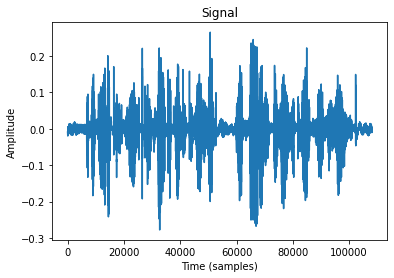

In [3]:
y, sr = librosa.load(sample)

plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');



Librosa also has a waveplot method for the same thing :)


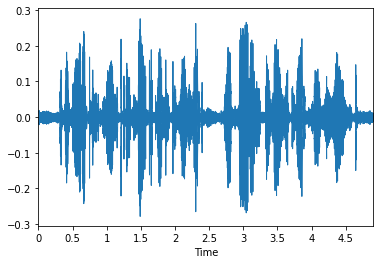

In [4]:
librosa.display.waveplot(y, sr=sr);



When we loaded a sample with librosa, we get the sample rate as well.


A sample rate of 22,050 means we're getting 22,050 samples in a given second. Let's see how many samples we have in total.



In [5]:
sr

22050

Alright! So if we get 108,156 samples, and we divide that by the sample rate, we should get the number of seconds in the audio. Let's see if that confirms our intuition.

In [6]:
len(y)

108156

Alright! So if we get 108,156 samples, and we divide that by the sample rate, we should get the number of seconds in the audio. Let's see if that confirms our intuition.

In [7]:
len(y) / sr

4.905034013605442

In [8]:
Audio(y, rate=sr*1.5)

In [9]:
Audio(y, rate=sr*0.75)

### Spectrograms

Cool, it's now time to build a spectrogram. We'll be using Short Time Fourier Transform (STFT), which means we will be using a bunch of Fourier Transforms (FT) since we have frequencies changing over time. Just as a reminder, FFT Is useful for decomposing a signal. STFT is useful for a signal that changes over time. It divides a long signal into shorter segments of equal length and applies Fourier transforms for each segment.

Let's then build a spectrogram! Note that there are different types of spectrograms and many variables you can play with. Let's compute Short-Time Fourier Transform using librosa.stft (spec) and see what we get out of it.


Text(0.5, 1.0, 'Almost Spectrogram')

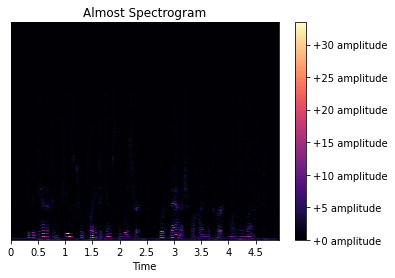

In [11]:


spec = np.abs(librosa.stft(y))
librosa.display.specshow(spec, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f amplitude')
plt.title('Almost Spectrogram')



Well, I cannot see anything here. What is going on? The sounds we (humans) hear are concentrated in a very small frequency and amplitude ranges, so plotting the raw data is not great.



What we can do is to transform the y axis to be log scaled and convert the amplitude to decibels. Making the data log-based will provide us much more informative information.


In [ ]:
dec_spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(dec_spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

Librosa allows you to create a mel-spectrogram in two ways using the librosa.feature.melspectrogram method:
- By providing the raw data, as we did before (you set the y param).
- By providing a pre-computer power spectrogram (you set S param).

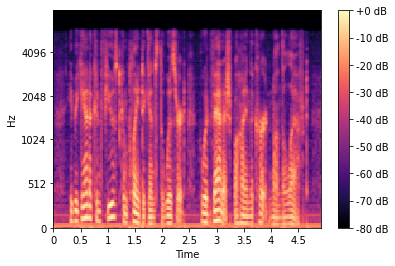

In [17]:


sg = librosa.feature.melspectrogram(y, sr=sr)
db_spec = librosa.power_to_db(sg, ref=np.max)
librosa.display.specshow(db_spec, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')



In [ ]:
sg = librosa.feature.melspectrogram(S=spec, sr=sr)
db_spec = librosa.amplitude_to_db(sg, ref=1.0, amin=1e-05, top_db=80.0)
librosa.display.specshow(db_spec, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')